# Group 3 - Phase 1

Roland Joseph Baja - 301252375

# Phase 1 Requirements

Deliverables:
Phase #1
1. Dataset data exploration: List the main finding of the dataset. Be thorough and creative.
For example, look at:
a. Counts, averages
b. Distribution of the number of reviews across products
c. Distribution of the number of reviews per product
d. Distribution of reviews per user
e. Review lengths and outliers
f. Analyze lengths
g. Check for duplicates
2. Text basic pre-processing:
a. Label your data based on the value of “rating of the product” i.e. as follows:
i. Ratings 4,5: Positive
ii. Rating 3: Neutral
iii. Ratings 1,2: Negative
b. Choose the appropriate columns for your sentiment analyzer. (Give this some
thought) and mention in your report why you chose each column.
c. Check for outliers
3. Study the below three Lexicons packages and choose two for model building justify why
you chose them:
i. Valence Aware Dictionary and Sentiment Reasoner (VADR) you can find
out more information here: https://github.com/cjhutto/vaderSentiment
ii. TextBlob you can find out more information here:
https://textblob.readthedocs.io/en/dev/quickstart.html
iii. SENTIWORDNET you can find more information here:
http://nmis.isti.cnr.it/sebastiani/Publications/LREC10.pdf
4. Pre-process your text as needed, justify each pre-processing step for each model you
chose. (Note: take into account the findings of step #3 above)
5. Randomly select 1000 reviews from your dataset.
6. Modeling (Sentiment Analysis) Lexicon approach:
a. Build two sentiment analysis models using the labeled pre-processed data for
both the lexicons packages the team selected in step #3 above.
7. Validate the results of both models and provide a comparison table.
8. Presentation: Check project presentation requirements.
9. Project report: Check project report requirements/ phase #1 (Make sure you reference
your work)
10. Submit documented code.



# 1. Dataset data exploration

In [1]:
#All Imported Modules(roland)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import contractions
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from sklearn.utils import resample
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix



C:\Users\rolan\AppData\Local\Temp\ipykernel_11940\3136934243.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# read and load Appliances.json to data frame(roland)
df = pd.read_json("Appliances_5.json", lines=True)

In [3]:
#dataframe information(roland)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2277 entries, 0 to 2276
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         2277 non-null   int64 
 1   verified        2277 non-null   bool  
 2   reviewTime      2277 non-null   object
 3   reviewerID      2277 non-null   object
 4   asin            2277 non-null   object
 5   style           38 non-null     object
 6   reviewerName    2277 non-null   object
 7   reviewText      2277 non-null   object
 8   summary         2277 non-null   object
 9   unixReviewTime  2277 non-null   int64 
 10  vote            2074 non-null   object
 11  image           828 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 215.7+ KB


In [4]:
#all List of Data Frame(roland)
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2272,5,True,"12 6, 2016",A2B2JVUX5YN8RU,B0006GVNOA,NaN,Caleb,Works great. I used it and an extension kit wi...,Worked like a charm,1480982400,6,[https://images-na.ssl-images-amazon.com/image...
2273,5,True,"03 20, 2016",A1IT56MV1C09VS,B0006GVNOA,NaN,Looneypenguin,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...,1458432000,5,[https://images-na.ssl-images-amazon.com/image...
2274,5,True,"10 15, 2016",A13391AZAFJ67K,B00570RQ0A,NaN,Fred A,good,Five Stars,1476489600,NaN,NaN
2275,5,True,"01 5, 2016",A2V0JXLJ9VCNNX,B00570RQ0A,NaN,Amazon Customer,washer washing,Five Stars,1451952000,NaN,NaN


# Title/Column Description
overall - Product Rating(int64)

verified - Product Verified(bool)

reviewTime - Time of the review(object)

reviewerID - ID of the reviewer(object)

asin- ID of the Product also known as Amazon Standard Identification Number(object)

style-style of the product(object)

reviewerName- The name of the reviewer of the product(object)

reviewText- Review of the product(object)

summary- Summary of the review(object)

unixReviewTime-(int64 )

vote - Votes if review is helpful or not (object)

image- Image from the user/reviewer(object)


In [5]:
#Data Frame Description(roland)
df.describe()

,overall,unixReviewTime
count,2277.000000,2.277000e+03
mean,4.499780,1.457410e+09
std,0.837723,5.639808e+07
min,1.000000,1.221523e+09
25%,4.000000,1.449274e+09
50%,5.000000,1.478650e+09
75%,5.000000,1.482278e+09
max,5.000000,1.523923e+09


In [6]:
df.count()

overall           2277
verified          2277
reviewTime        2277
reviewerID        2277
asin              2277
style               38
reviewerName      2277
reviewText        2277
summary           2277
unixReviewTime    2277
vote              2074
image              828
dtype: int64

In [7]:
#Product  Value counts(roland)
print("Product ID Breakdown:", df['asin'].value_counts(), "\n")
print("Product Style Breakdown:", df['style'].value_counts(), "\n")
print("Verified Breakdown:", df['verified'].value_counts(), "\n")

Product ID Breakdown: asin
B0006GVNOA    2040
B0014CN8Y8      24
B00JGTUQJ6      13
B0015UGPWQ      12
B00CW0O1EW       8
B0056I99WG       8
B004XLDE5A       8
B000XXWOGW       8
B0053F80JA       7
B000NCTOUM       7
B000N6302Q       7
B00P9C66PM       7
B001DPFP88       7
B00570RQ0A       6
B00DM8J11Q       6
B00MGMWTQS       6
B001769IVI       6
B001DHLGOS       6
B00126NABC       6
B004XLDDNI       5
B00470A1S0       5
B008YDSH6E       5
B004XLDHSE       5
B004UB1O9Q       5
B00W4YKCGC       5
B00009W3PA       5
B00DM8JA7Q       5
B000VL060M       4
B0053F7TQA       4
B000XXYUSM       4
B00DM8KQ2Y       4
B00AHR3IG4       4
B0042U16YI       2
B0013DN4NI       2
B00147DFQ4       2
B00186NSGS       2
B00149JVOC       2
B000XTJRRA       2
B000W3P4AQ       2
B000VLI74Y       2
B0015S4KIO       2
B00009W3I4       1
B00BIZDI0A       1
B009PCI2JU       1
B0045LLC7K       1
B001DPQPKU       1
B0009GVYNW       1
B0042ACZU2       1
Name: count, dtype: int64 

Product Style Breakdown: style
{'

In [8]:
#Rating Value counts(roland)
print("Overall/Star Breakdown:", df['overall'].value_counts(), "\n")
print("Vote Breakdown:", df['vote'].value_counts(), "\n")

Overall/Star Breakdown: overall
5    1612
3     421
4     222
2      13
1       9
Name: count, dtype: int64 

Vote Breakdown: vote
6        412
5        208
4        206
15       206
9        206
8        206
165      206
311      204
1,917    204
3          3
2          3
7          2
11         2
309        2
1,913      2
77         2
Name: count, dtype: int64 



In [9]:
#Reviewer Value counts(roland)
print("Reviewer ID Breakdown:", df['reviewerID'].value_counts(), "\n")
print("Reviewer Name Breakdown:", df['reviewerName'].value_counts(), "\n")

Reviewer ID Breakdown: reviewerID
A8WEXFRWX1ZHH     206
A1WD61B0C3KQZB    206
A25C30G90PKSQA    206
A2B2JVUX5YN8RU    206
AMY6O4Z9HINO0     206
A3TMNU7VNK5JJE    206
A1IT56MV1C09VS    206
A2LDP3A4IE9T6T    206
A21TPY9BVC9IKZ    206
A3VYM3NY7W4MX4    206
A13391AZAFJ67K      9
A3GP2HMB2AFOKF      8
A37DQO5LU8DXTV      8
A6FPI5CM4W5WB       8
A1Y4UNHRP312HS      7
A2V0JXLJ9VCNNX      7
A26M3TN8QICJ3K      7
ALZOND1IEW8KS       7
A1EUO0BU72JR7T      7
AFUVGAUNQVT0S       6
A34A1UP40713F8      6
A3LGZ8M29PBNGG      6
A3NHUQ33CFH3VM      6
A2CIEGHZ7L1WWR      6
A11SCLK8GDDN3C      6
A1LN48DHHCKLR3      6
A2OP8DEIIUESP       6
A1T1YSCDW0PD25      6
A1H2V1GNEY4LZ0      5
A8R48NKTGCJDQ       5
A2O7BWHBIV1HWZ      5
AR3OHHHW01A8E       5
A1AHW6I678O6F2      5
A329823SXZ8IBE      5
AVGG8CYK8K312       5
A3H61AMBJ177DG      5
A1RQQV9HYHDHDN      5
A23KSPVPHZF6EO      5
A3J8IC20SGBS2O      5
A1OB2H416ARLFJ      5
A1HWFUO5PKB2RW      5
A3SM7H70QI3TY8      5
A3B1B4E184FSUZ      5
AJPRN1TD1A0SD       

In [10]:
#Time(roland)
print("unixReviewTime Breakdown:", df['unixReviewTime'].value_counts(), "\n")
print("Review Time Breakdown:", df['reviewTime'].value_counts(), "\n")


unixReviewTime Breakdown: unixReviewTime
1480982400    412
1482278400    207
1487980800    206
1299024000    206
1515974400    206
             ... 
1486339200      1
1473379200      1
1441584000      1
1411344000      1
1480896000      1
Name: count, Length: 99, dtype: int64 

Review Time Breakdown: reviewTime
12 6, 2016     412
12 21, 2016    207
02 25, 2017    206
03 2, 2011     206
01 15, 2018    206
              ... 
02 6, 2017       1
09 9, 2016       1
09 7, 2015       1
09 22, 2014      1
12 5, 2016       1
Name: count, Length: 99, dtype: int64 



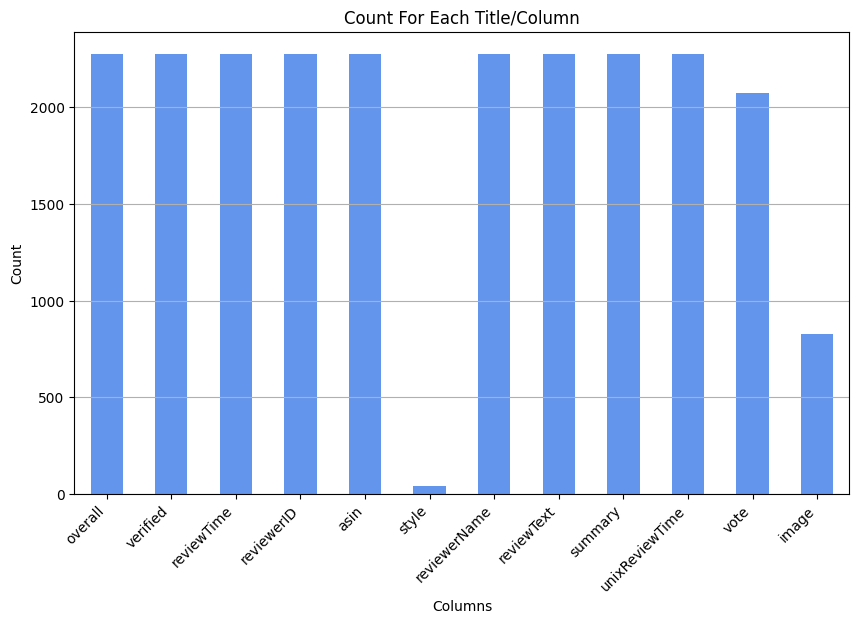

In [11]:
# Plot bar per Title(roland)
plt.figure(figsize=(10, 6))
df.count().plot(kind='bar', color='cornflowerblue')
plt.title('Count For Each Title/Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='solid', alpha=1)
plt.show()

In [12]:
#Count and Average of overall and review time(roland)

print("Overall Average =",df['overall'].mean())
print("Overall  Counts =",df['overall'].count())
print("Product ID  Counts =",df['asin'].count())

Overall Average = 4.499780412823891
Overall  Counts = 2277
Product ID  Counts = 2277


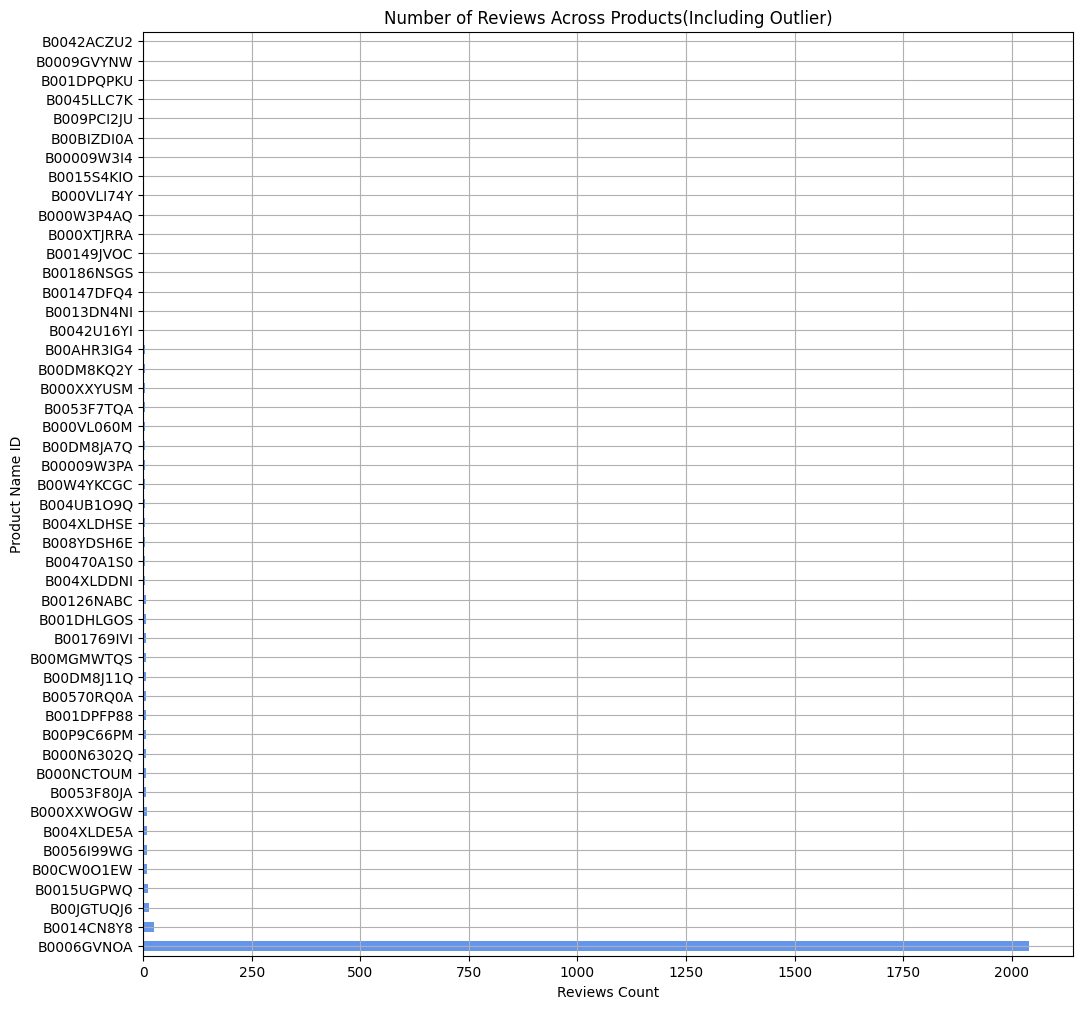

In [13]:
# number of reviews per product(roland)
plt.figure(figsize=(12, 12))
df['asin'].value_counts().plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews Across Products(Including Outlier)')
plt.ylabel('Product Name ID')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

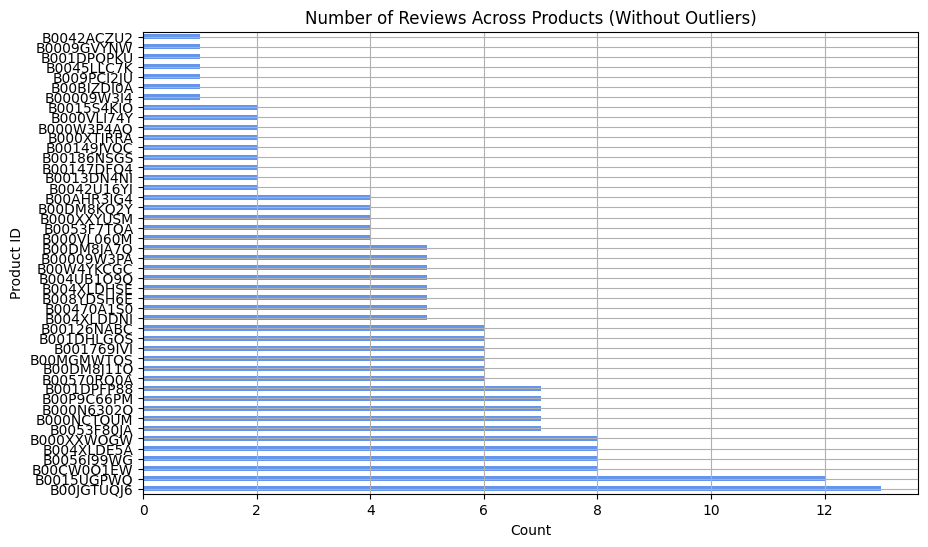

In [14]:
# Assigning Value to Q1 and Q3(roland)
Q1 = df['asin'].value_counts().quantile(0.25)
Q3 = df['asin'].value_counts().quantile(0.75)
# IQR= Interquartile range
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_quartile = Q1 - 1.5 * IQR
upper_quartile = Q3 + 1.5 * IQR

# Filter/removing outliers
filtered = df['asin'].value_counts()[(df['asin'].value_counts() >= lower_quartile) & (df['asin'].value_counts() <= upper_quartile)]

# Plot bar chart for filtered 'asin' value counts
plt.figure(figsize=(10, 6))
filtered.plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews Across Products (Without Outliers)')
plt.xlabel('Count')
plt.ylabel('Product ID')
plt.grid( linestyle='solid', alpha=1)
plt.show()

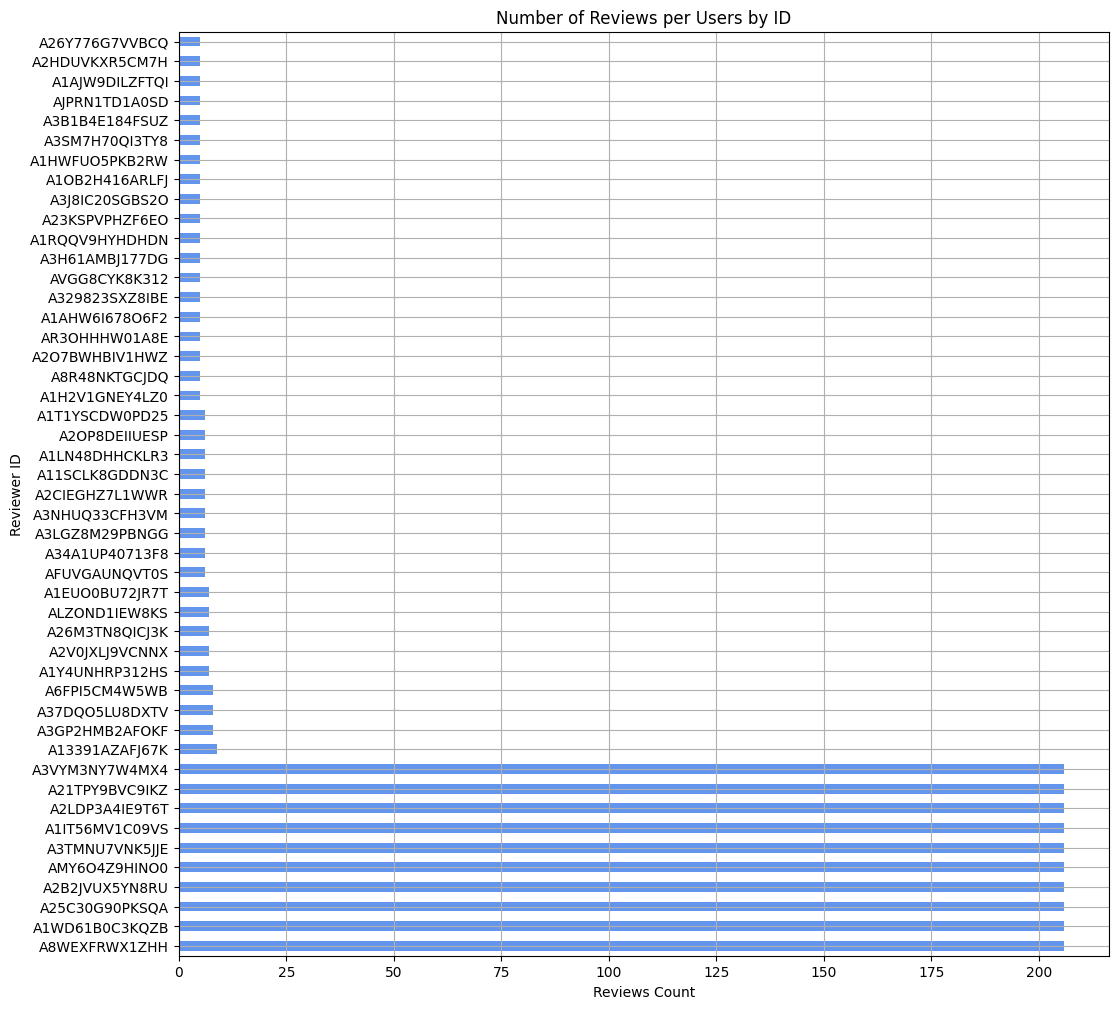

In [15]:
# number of reviews per product(roland)
plt.figure(figsize=(12, 12))
df['reviewerID'].value_counts().plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews per Users by ID')
plt.ylabel('Reviewer ID')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

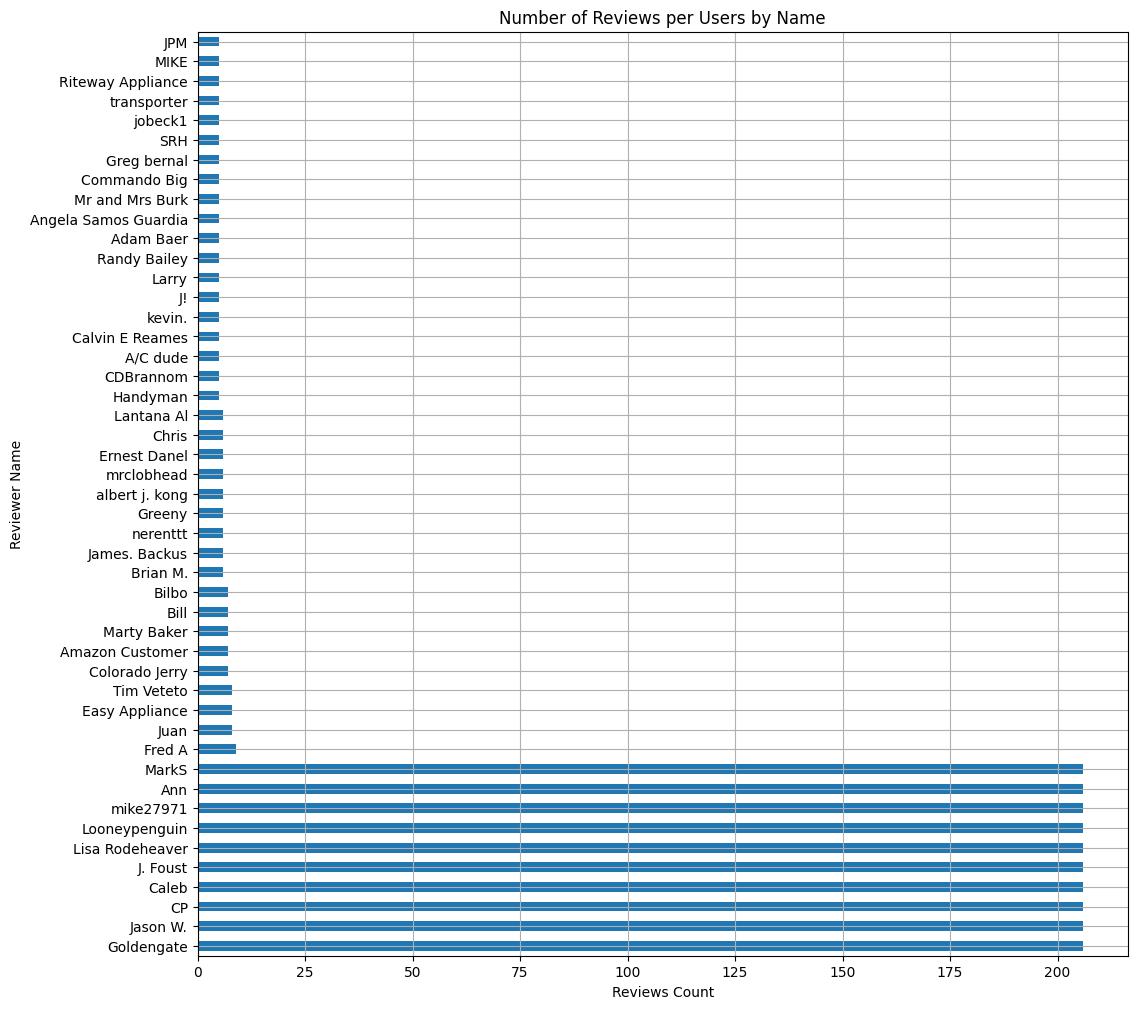

In [16]:
# number of User reviews(roland)
plt.figure(figsize=(12, 12))
df['reviewerName'].value_counts().plot(kind='barh')
plt.title('Number of Reviews per Users by Name')
plt.ylabel('Reviewer Name')
plt.xlabel('Reviews Count')
plt.grid( linestyle='solid', alpha=1)
plt.show()

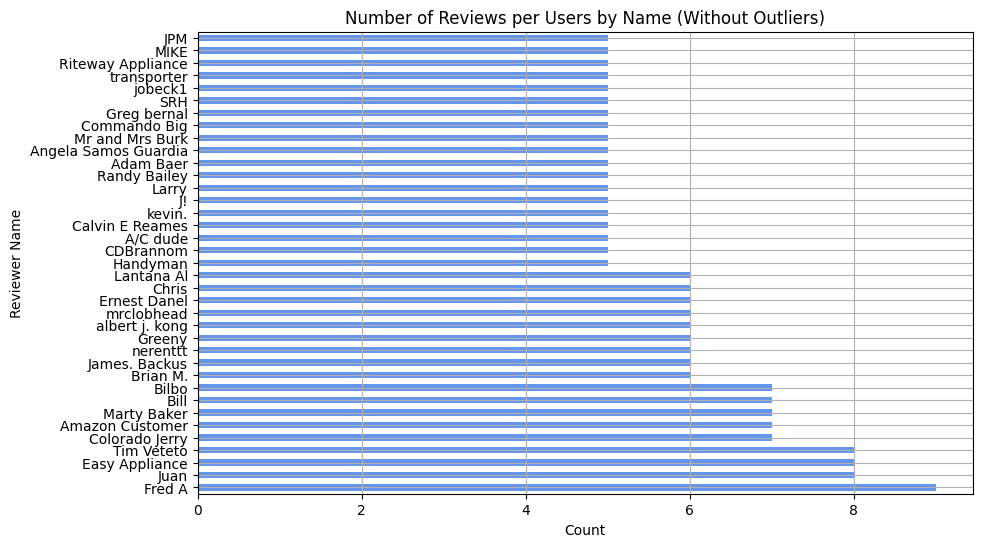

In [17]:
# Assigning Value to Q1 and Q3(roland)
Q1 = df['reviewerName'].value_counts().quantile(0.25)
Q3 = df['reviewerName'].value_counts().quantile(0.75)
# IQR= Interquartile range
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
lower_quartile = Q1 - 1.5 * IQR
upper_quartile = Q3 + 1.5 * IQR

# Filter/removing outliers
filtered = df['reviewerName'].value_counts()[(df['reviewerName'].value_counts() >= lower_quartile) & (df['reviewerName'].value_counts() <= upper_quartile)]

# Plot bar chart for filtered 'asin' value counts
plt.figure(figsize=(10, 6))
filtered.plot(kind='barh', color='cornflowerblue')
plt.title('Number of Reviews per Users by Name (Without Outliers)')
plt.xlabel('Count')
plt.ylabel('Reviewer Name')
plt.grid( linestyle='solid', alpha=1)
plt.show()

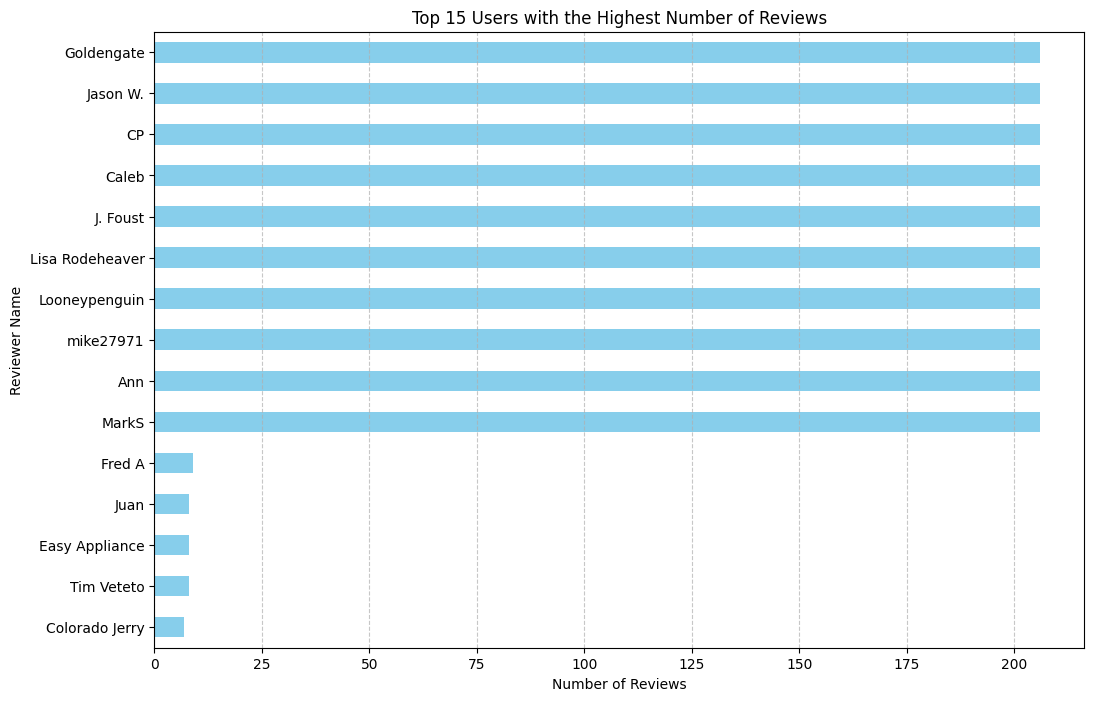

In [18]:
# plotting top 15 reviewers
plt.figure(figsize=(12, 8))
df['reviewerName'].value_counts().nlargest(15).plot(kind='barh', color='skyblue')
plt.title('Top 15 Users with the Highest Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviewer Name')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


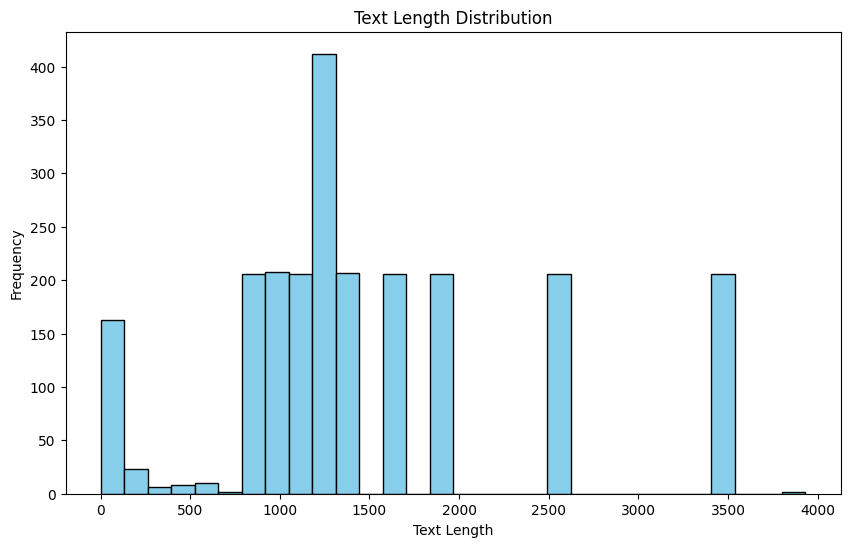

In [19]:
# Analyzing lengths (Christian)
plt.figure(figsize=(10, 6))
df['text_length'] = df['reviewText'].apply(len)
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Checking for duplicates (Christian)
duplicates = df[df.duplicated("reviewText")]

# Print just the content of the 'reviewText' column for duplicates found
print("Duplicates found:")
print(duplicates['reviewText'])

Duplicates found:
11      Be careful, NewAir will not stand by their pro...
12      We would give less than 1 star if possible DON...
13      We would give less than 1 star if possible DON...
29                                            received ok
34      i cook only once in a blue moon.  i was shocke...
                              ...                        
2270    Great product but they need to include more ro...
2271    first thing first: it works. the kit is great ...
2272    Works great. I used it and an extension kit wi...
2273    Anyone who thinks they don't have a problem wi...
2274                                                 good
Name: reviewText, Length: 2133, dtype: object


Number of Verified(True) vs Unverified(False) verified
True     2248
False      29
Name: count, dtype: int64


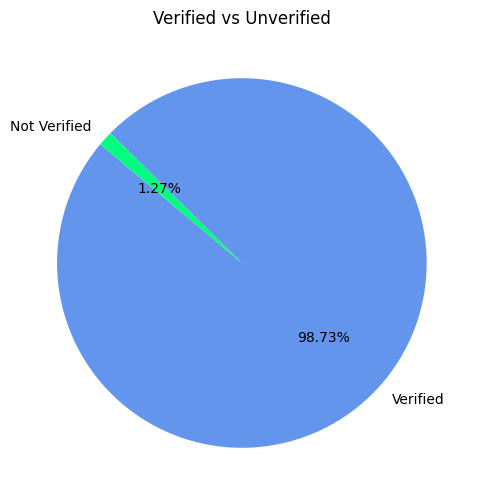

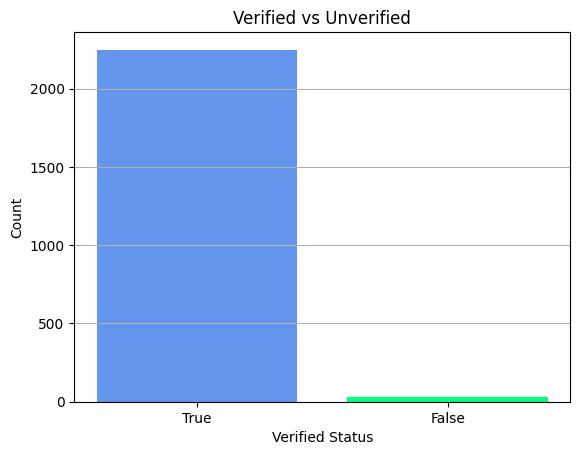

In [21]:
#verified reviews count distribution(roland)
print("Number of Verified(True) vs Unverified(False)",df['verified'].value_counts())

labels = ['Verified','Not Verified']
value_counts = df['verified'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=labels, autopct='%2.2f%%', startangle=140, colors = ['cornflowerblue', 'springgreen'])
plt.title('Verified vs Unverified')
plt.grid( linestyle='solid', alpha=1)
plt.show()

plt.bar(value_counts.index.astype(str), value_counts.values, color=['cornflowerblue', 'springgreen'])
plt.xlabel('Verified Status')
plt.ylabel('Count')
plt.title('Verified vs Unverified')
plt.grid(axis='y', linestyle='solid', alpha=1)

plt.show()

# 2. Text basic pre-processing

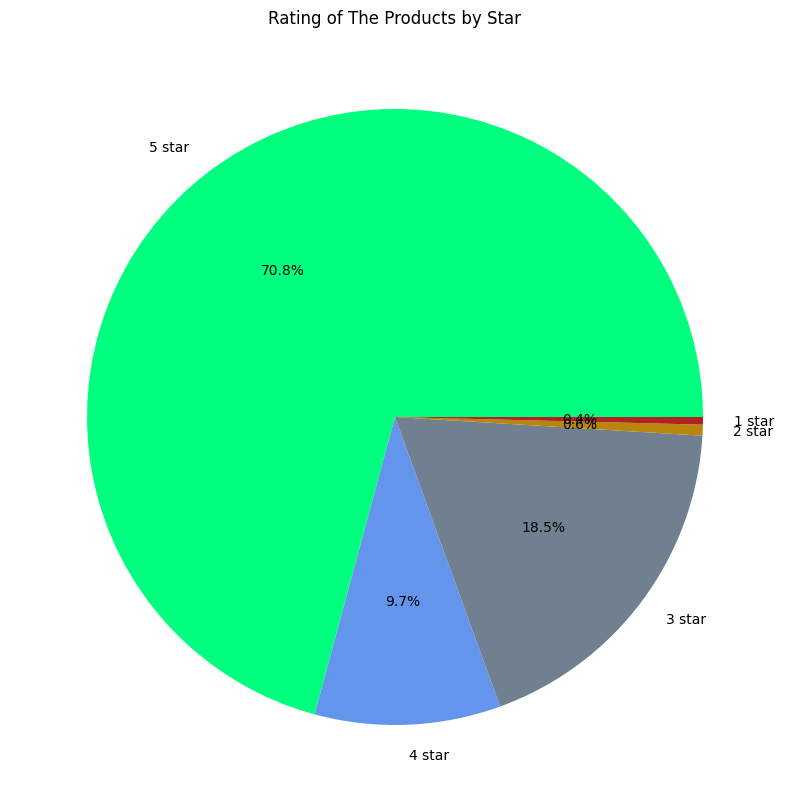

In [22]:
# Pie Chart(roland)
value_counts = df['overall'].value_counts()
min_rating = df['overall'].min()
max_rating = df['overall'].max()
labels = [f"{i} star" for i in range(max_rating, min_rating - 1, -1)]

# Sorting counts in descending order
sorted_counts = value_counts.sort_index(ascending=False)

# Plotting the pie chart with dynamically generated labels and sorted counts
plt.figure(figsize=(10, 10))
plt.pie(sorted_counts, labels=labels, autopct='%1.1f%%', labeldistance=1.10, colors = ['springgreen', 'cornflowerblue','slategray', 'darkgoldenrod','firebrick'] )
plt.title('Rating of The Products by Star')
plt.show()


Counts of each category:
rating
Positive    1834
Neutral      421
Negative      22
Name: count, dtype: int64


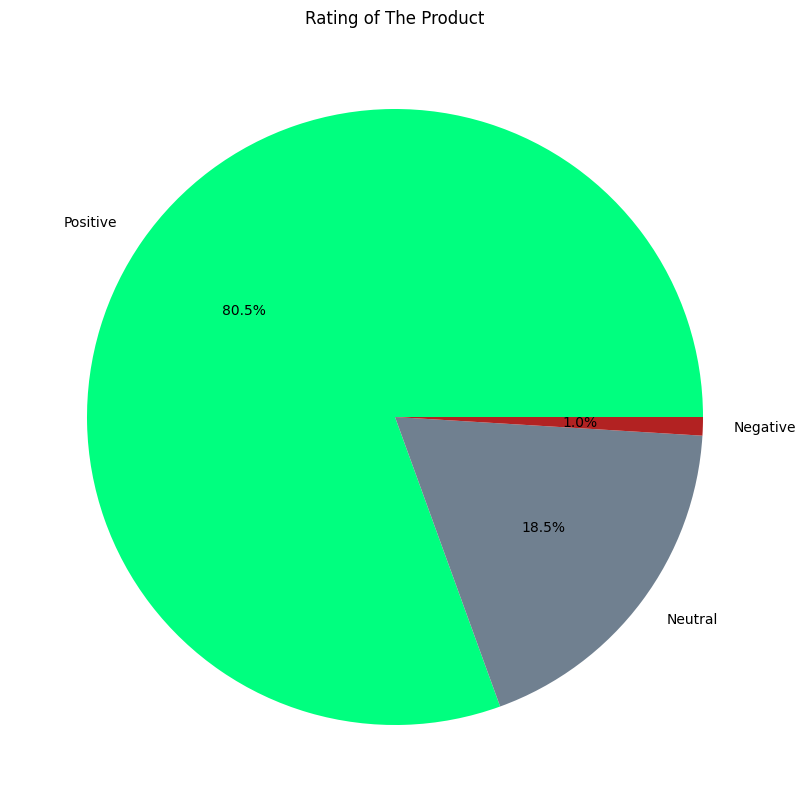

In [23]:
#pie chart with if x<2='negative', else if x = 'neutral', else 'positive'(roland)
print("Counts of each category:")

df['rating'] = df['overall'].apply(lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive'))
print(df['rating'].value_counts())
plt.figure(figsize=(10, 10))
plt.pie(df['rating'].value_counts(), labels=df['rating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product')
plt.show()




In [24]:
#updated df with rating column added(roland)
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,text_length,rating
0,5,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something tha...,Great product,1377129600,NaN,NaN,157,Positive
1,5,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN,9,Positive
2,5,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN,30,Positive
3,5,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN,30,Positive
4,5,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN,33,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,5,True,"12 6, 2016",A2B2JVUX5YN8RU,B0006GVNOA,NaN,Caleb,Works great. I used it and an extension kit wi...,Worked like a charm,1480982400,6,[https://images-na.ssl-images-amazon.com/image...,888,Positive
2273,5,True,"03 20, 2016",A1IT56MV1C09VS,B0006GVNOA,NaN,Looneypenguin,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...,1458432000,5,[https://images-na.ssl-images-amazon.com/image...,1139,Positive
2274,5,True,"10 15, 2016",A13391AZAFJ67K,B00570RQ0A,NaN,Fred A,good,Five Stars,1476489600,NaN,NaN,4,Positive
2275,5,True,"01 5, 2016",A2V0JXLJ9VCNNX,B00570RQ0A,NaN,Amazon Customer,washer washing,Five Stars,1451952000,NaN,NaN,14,Positive


In [25]:
#making outlier for the text based on their length size(roland)
df['text_length'] = df['reviewText'].apply(len)
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_quantile = Q1 - 1.5 * IQR
upper_quantile = Q3 + 1.5 * IQR

# Identify outliers based on the lower and upper bounds
outliers = df[(df['text_length'] < lower_quantile) | (df['text_length'] > upper_quantile)]

# Display outliers
print("Text outliers based on IQR method:")
outliers[['reviewText', 'text_length', 'summary']]


Text outliers based on IQR method:


,reviewText,text_length,summary
9,"Be careful, NewAir will not stand by their pro...",3932,NewAir will not stand behind their products - ...
11,"Be careful, NewAir will not stand by their pro...",3932,NewAir will not stand behind their products - ...
38,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
77,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
118,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
...,...,...,...
2108,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2118,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2128,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...
2138,This review is for Gardus RLE202 LintEater 10-...,3421,5 stars isn't enough to rate this product! It'...


In [26]:
# Columns that will be used for Sentiment Analysis(roland)
selected_columns = df[['overall','rating', 'reviewText','summary']]
selected_columns

,overall,rating,reviewText,summary
0,5,Positive,I like this as a vent as well as something tha...,Great product
1,5,Positive,good item,Five Stars
2,5,Positive,Fit my new LG dryer perfectly.,Five Stars
3,5,Positive,Good value for electric dryers,Perfect size
4,5,Positive,Price and delivery was excellent.,Five Stars
...,...,...,...,...
2272,5,Positive,Works great. I used it and an extension kit wi...,Worked like a charm
2273,5,Positive,Anyone who thinks they don't have a problem wi...,Excellent product and showed me that my vent o...
2274,5,Positive,good,Five Stars
2275,5,Positive,washer washing,Five Stars


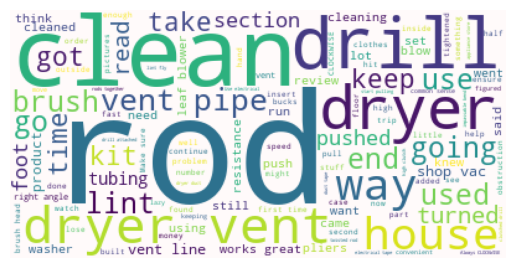

In [27]:
#wordcloud for reviewText(can be use for textblob lexicon)(roland)
from wordcloud import WordCloud
wcreviewtext = " ".join(review for review in selected_columns['reviewText'].dropna())
wordcloud = WordCloud(background_color="snow").generate(wcreviewtext)
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.show()

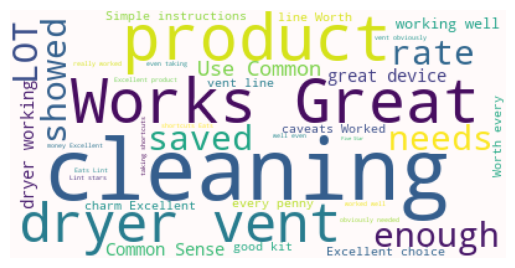

In [28]:
#wordcloud for summary(can be use for textblob lexicon)(roland)
wcreviewtext = " ".join(review for review in selected_columns['summary'].dropna())
wordcloud = WordCloud(background_color="snow").generate(wcreviewtext)
plt.imshow(wordcloud, interpolation='hamming')
plt.axis("off")
plt.show()

# 3. Two Lexicons Packages

In [29]:
# need to download vader to be used(roland)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rolan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# 4. Pre-process your text as needed, justify each pre-processing step for each model you

In [30]:
# Create a SentimentIntensityAnalyzer object(roland)
sia = SentimentIntensityAnalyzer()

# Function to preprocess text using VADER and return compound sentiment score
def preprocess_text_with_vader(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [31]:
# Vader Preprocess column using reviewText(roland)
df['reviewText_vaderValue'] = df['reviewText'].apply(preprocess_text_with_vader)
df['reviewText_vaderRating'] = df['reviewText_vaderValue'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


df[['overall', 'rating', 'reviewText', 'reviewText_vaderValue', 'reviewText_vaderRating']]

,overall,rating,reviewText,reviewText_vaderValue,reviewText_vaderRating
0,5,Positive,I like this as a vent as well as something tha...,0.8720,Positive
1,5,Positive,good item,0.4404,Positive
2,5,Positive,Fit my new LG dryer perfectly.,0.7717,Positive
3,5,Positive,Good value for electric dryers,0.6486,Positive
4,5,Positive,Price and delivery was excellent.,0.5719,Positive
...,...,...,...,...,...
2272,5,Positive,Works great. I used it and an extension kit wi...,0.9591,Positive
2273,5,Positive,Anyone who thinks they don't have a problem wi...,0.9443,Positive
2274,5,Positive,good,0.4404,Positive
2275,5,Positive,washer washing,0.0000,Neutral


In [32]:
# Vader Preprocess column using summary(roland)
df['summary_vaderValue'] = df['summary'].apply(preprocess_text_with_vader)
df['summary_vaderRating'] = df['summary_vaderValue'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


df[['overall', 'rating', 'summary','summary_vaderValue', 'summary_vaderRating']]

,overall,rating,summary,summary_vaderValue,summary_vaderRating
0,5,Positive,Great product,0.6249,Positive
1,5,Positive,Five Stars,0.0000,Neutral
2,5,Positive,Five Stars,0.0000,Neutral
3,5,Positive,Perfect size,0.5719,Positive
4,5,Positive,Five Stars,0.0000,Neutral
...,...,...,...,...,...
2272,5,Positive,Worked like a charm,0.6369,Positive
2273,5,Positive,Excellent product and showed me that my vent o...,0.5719,Positive
2274,5,Positive,Five Stars,0.0000,Neutral
2275,5,Positive,Five Stars,0.0000,Neutral


# 5 Randomly select 1000 reviews from your dataset

In [33]:
# Randomly select 1000 reviews from your dataset.(roland)
random_df = df.sample(n=1000, random_state=75)
random_df


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,text_length,rating,reviewText_vaderValue,reviewText_vaderRating,summary_vaderValue,summary_vaderRating
2220,5,True,"12 10, 2014",AVGG8CYK8K312,B00DM8JA7Q,NaN,Larry,These are a great buy I replace alot of them t...,Lid switch,1418169600,NaN,NaN,66,Positive,0.8126,Positive,0.0000,Neutral
1957,5,True,"03 2, 2011",A21TPY9BVC9IKZ,B0006GVNOA,NaN,Ann,"So, this is what life comes down to when you a...",Eats Lint,1299024000,"1,917",NaN,1198,Positive,0.8141,Positive,0.0000,Neutral
900,3,True,"09 10, 2016",A3TMNU7VNK5JJE,B0006GVNOA,NaN,Lisa Rodeheaver,At first this contraption was a little confusi...,Does what it needs to,1473465600,8,NaN,971,Neutral,0.8606,Positive,0.0000,Neutral
508,5,True,"12 21, 2016",A3VYM3NY7W4MX4,B0006GVNOA,NaN,MarkS,This review is for Gardus RLE202 LintEater 10-...,5 stars isn't enough to rate this product! It'...,1482278400,15,NaN,3421,Positive,0.9737,Positive,0.5242,Positive
1980,3,True,"09 10, 2016",A3TMNU7VNK5JJE,B0006GVNOA,NaN,Lisa Rodeheaver,At first this contraption was a little confusi...,Does what it needs to,1473465600,8,NaN,971,Neutral,0.8606,Positive,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,3,True,"12 6, 2016",A25C30G90PKSQA,B0006GVNOA,NaN,CP,first thing first: it works. the kit is great ...,good kit with some caveats,1480982400,6,NaN,1196,Neutral,0.8544,Positive,0.4404,Positive
576,5,True,"12 5, 2015",A2LDP3A4IE9T6T,B0006GVNOA,NaN,mike27971,We have 24 foot of solid dryer vent pipe endin...,This really worked well even taking shortcuts,1449273600,165,[https://images-na.ssl-images-amazon.com/image...,1864,Positive,0.9483,Positive,0.3353,Positive
1170,3,True,"09 10, 2016",A3TMNU7VNK5JJE,B0006GVNOA,NaN,Lisa Rodeheaver,At first this contraption was a little confusi...,Does what it needs to,1473465600,8,NaN,971,Neutral,0.8606,Positive,0.0000,Neutral
1705,5,True,"02 25, 2017",A8WEXFRWX1ZHH,B0006GVNOA,NaN,Goldengate,I bought this last October and finally got aro...,A great device that has my dryer working well ...,1487980800,311,NaN,1662,Positive,0.9734,Positive,0.7351,Positive


# 6. Modeling (Sentiment Analysis) Lexicon approach:

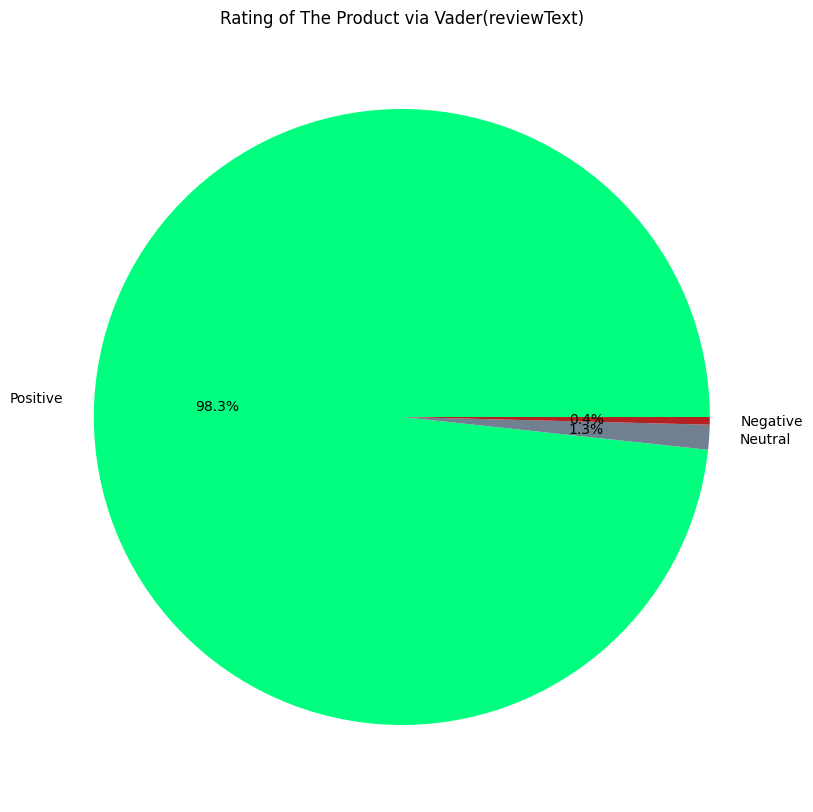

Counts of each category:
reviewText_vaderRating
Positive    983
Neutral      13
Negative      4
Name: count, dtype: int64


In [34]:
# Vader modeling/plotting using reviewText_vaderRating(roland)
plt.figure(figsize=(10, 10))
plt.pie(random_df['reviewText_vaderRating'].value_counts(), labels=random_df['reviewText_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product via Vader(reviewText)')
plt.show()

print("Counts of each category:")
print(random_df['reviewText_vaderRating'].value_counts())

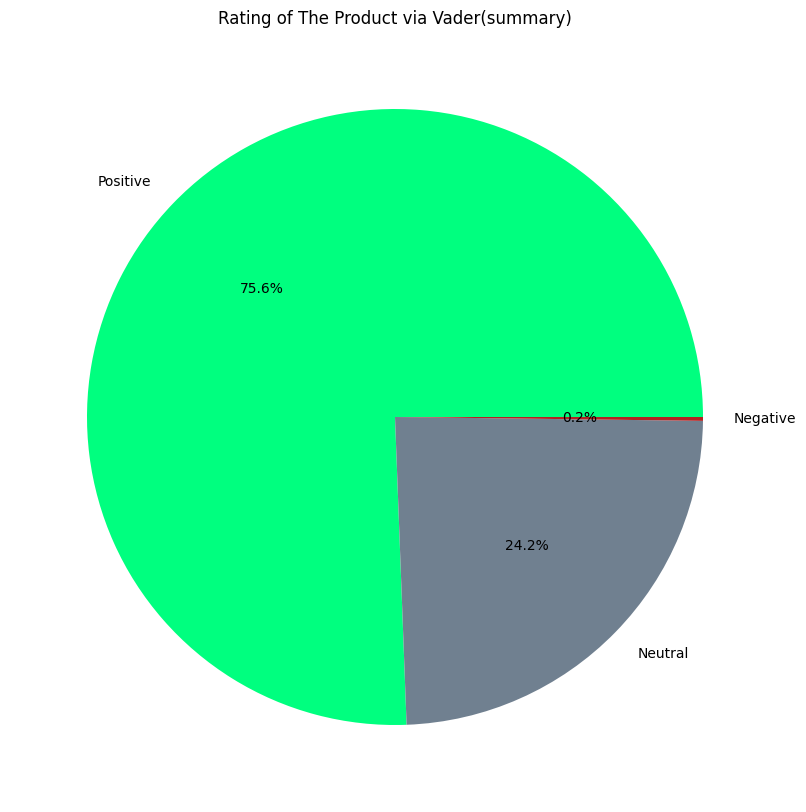

Counts of each category:
summary_vaderRating
Positive    756
Neutral     242
Negative      2
Name: count, dtype: int64


In [35]:
# Vader modeling/plotting using summary_vaderRating(roland)
plt.figure(figsize=(10, 10))
plt.pie(random_df['summary_vaderRating'].value_counts(), labels=random_df['summary_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Rating of The Product via Vader(summary)')
plt.show()

print("Counts of each category:")
print(random_df['summary_vaderRating'].value_counts())

Counts of each category for reviewText_vaderRating:
reviewText_vaderRating
Positive    983
Neutral      13
Negative      4
Name: count, dtype: int64

Counts of each category for summary_vaderRating:
summary_vaderRating
Positive    756
Neutral     242
Negative      2
Name: count, dtype: int64

Counts of each category for overall rating:
rating
Positive    1834
Neutral      421
Negative      22
Name: count, dtype: int64


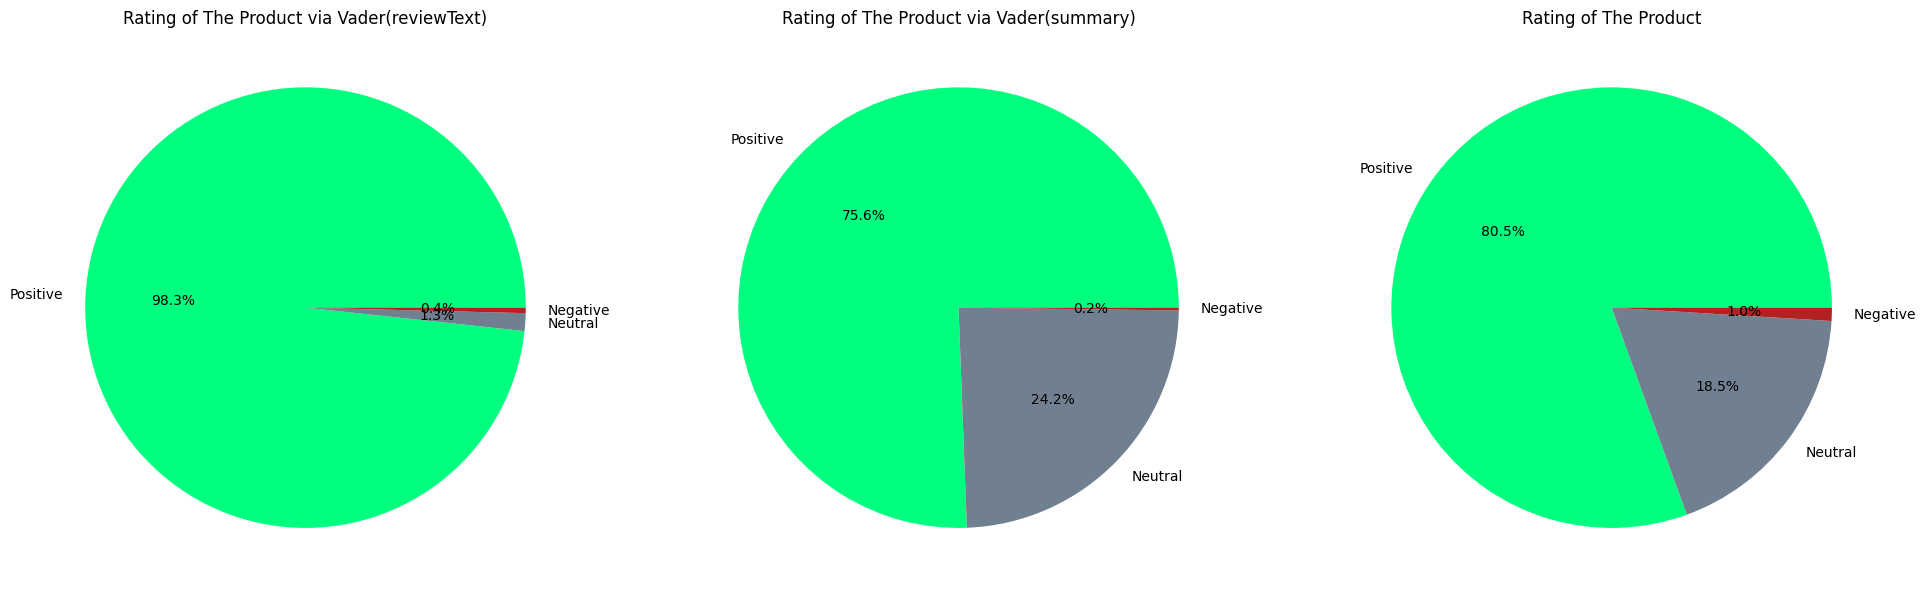

In [36]:
# Setting up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Vader modeling/plotting using reviewText_vaderRating(roland)
axes[0].pie(random_df['reviewText_vaderRating'].value_counts(), labels=random_df['reviewText_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
axes[0].set_title('Rating of The Product via Vader(reviewText)')

# Vader modeling/plotting using summary_vaderRating(roland)
axes[1].pie(random_df['summary_vaderRating'].value_counts(), labels=random_df['summary_vaderRating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
axes[1].set_title('Rating of The Product via Vader(summary)')

# Pie chart with if x<2='negative', else if x = 'neutral', else 'positive'(roland)
df['rating'] = df['overall'].apply(lambda x: 'Negative' if x <= 2 else ('Neutral' if x == 3 else 'Positive'))
axes[2].pie(df['rating'].value_counts(), labels=df['rating'].value_counts().index, autopct='%1.1f%%', labeldistance=1.10, colors=['springgreen', 'slategray', 'firebrick'])
axes[2].set_title('Rating of The Product')

# Show counts of each category
print("Counts of each category for reviewText_vaderRating:")
print(random_df['reviewText_vaderRating'].value_counts())
print("\nCounts of each category for summary_vaderRating:")
print(random_df['summary_vaderRating'].value_counts())
print("\nCounts of each category for overall rating:")
print(df['rating'].value_counts())

plt.tight_layout()
plt.show()


# 7. Validate the results of both models and provide a comparison table.

In [37]:
#just a guide, will be deleted 
random_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2220 to 1274
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   overall                 1000 non-null   int64  
 1   verified                1000 non-null   bool   
 2   reviewTime              1000 non-null   object 
 3   reviewerID              1000 non-null   object 
 4   asin                    1000 non-null   object 
 5   style                   13 non-null     object 
 6   reviewerName            1000 non-null   object 
 7   reviewText              1000 non-null   object 
 8   summary                 1000 non-null   object 
 9   unixReviewTime          1000 non-null   int64  
 10  vote                    916 non-null    object 
 11  image                   357 non-null    object 
 12  text_length             1000 non-null   int64  
 13  rating                  1000 non-null   object 
 14  reviewText_vaderValue   1000 non-null   fl

In [38]:
from textblob import TextBlob

In [39]:
# Function to calculate sentiment polarity using TextBlob
def calculate_textblob_polarity(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return polarity

In [40]:
# Function to categorize sentiment based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [41]:
# Apply TextBlob sentiment analysis to reviewText
df['reviewText_textblobPolarity'] = df['reviewText'].apply(calculate_textblob_polarity)
df['reviewText_textblobSentiment'] = df['reviewText_textblobPolarity'].apply(categorize_sentiment)

In [42]:
# Apply TextBlob sentiment analysis to summary
df['summary_textblobPolarity'] = df['summary'].apply(calculate_textblob_polarity)
df['summary_textblobSentiment'] = df['summary_textblobPolarity'].apply(categorize_sentiment)

In [43]:
# Display sentiment analysis results
print("Sentiment analysis results using TextBlob:")
print(df[['reviewText', 'reviewText_textblobPolarity', 'reviewText_textblobSentiment']].head())
print(df[['summary', 'summary_textblobPolarity', 'summary_textblobSentiment']].head())

Sentiment analysis results using TextBlob:
                                          reviewText  \
0  I like this as a vent as well as something tha...   
1                                          good item   
2                     Fit my new LG dryer perfectly.   
3                     Good value for electric dryers   
4                  Price and delivery was excellent.   

   reviewText_textblobPolarity reviewText_textblobSentiment  
0                     0.400000                     Positive  
1                     0.700000                     Positive  
2                     0.512121                     Positive  
3                     0.700000                     Positive  
4                     1.000000                     Positive  
         summary  summary_textblobPolarity summary_textblobSentiment
0  Great product                       0.8                  Positive
1     Five Stars                       0.0                   Neutral
2     Five Stars                       0.

In [44]:
import matplotlib.pyplot as plt

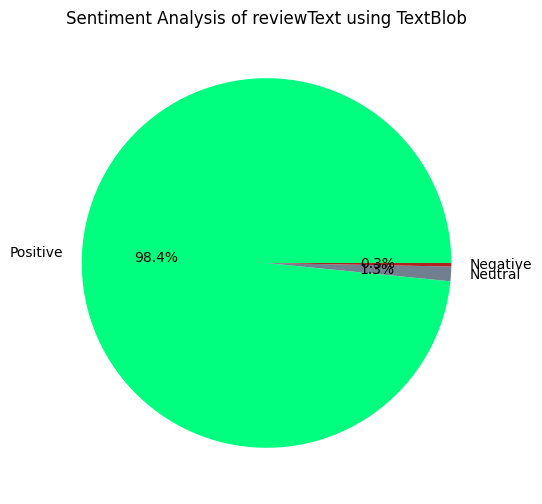

In [45]:
# Plotting sentiment analysis results for reviewText
plt.figure(figsize=(10, 6))
df['reviewText_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Sentiment Analysis of reviewText using TextBlob')
plt.ylabel('')
plt.show()

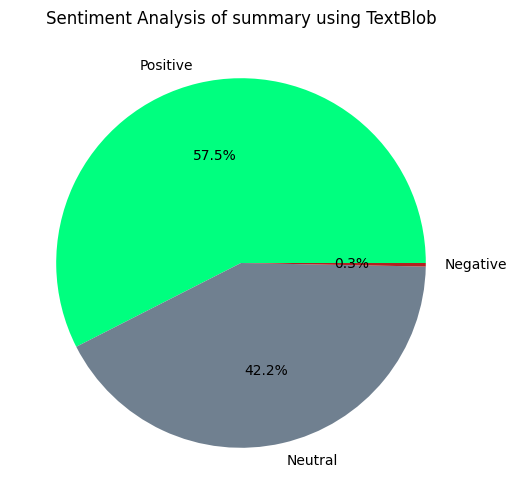

In [46]:
# Plotting sentiment analysis results for summary
plt.figure(figsize=(10, 6))
df['summary_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['springgreen', 'slategray', 'firebrick'])
plt.title('Sentiment Analysis of summary using TextBlob')
plt.ylabel('')
plt.show()

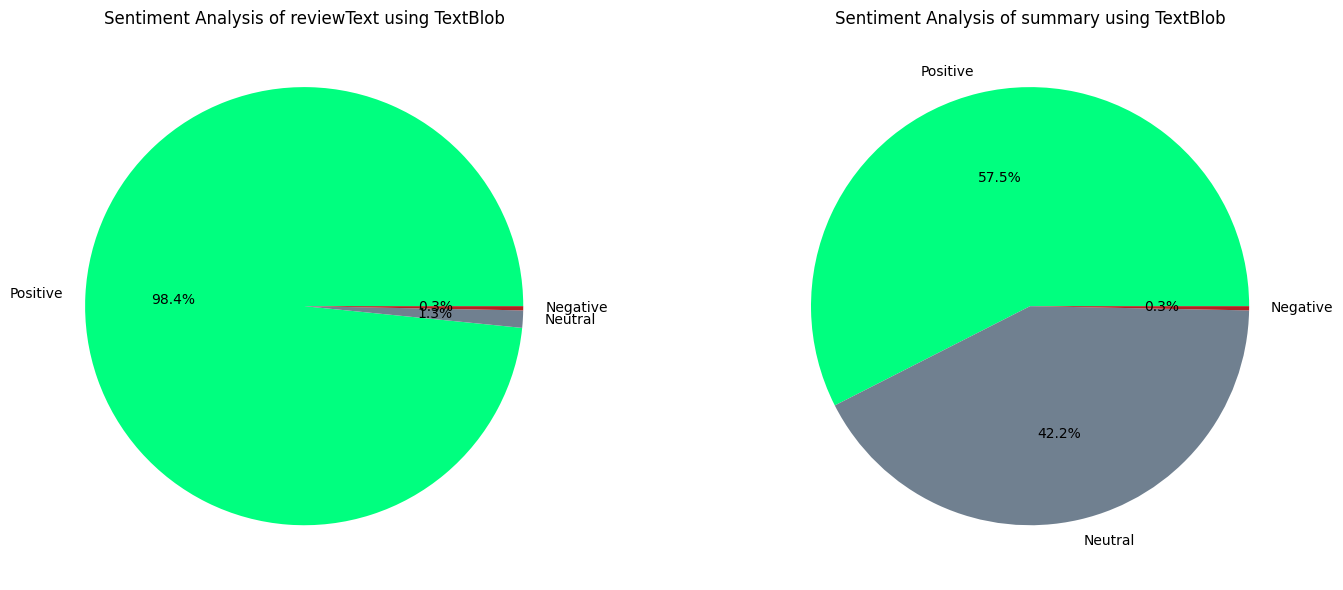

In [47]:
# Setting up subplots for comparison with VADER results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plotting sentiment analysis results for reviewText
df['reviewText_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], colors=['springgreen', 'slategray', 'firebrick'])
axes[0].set_title('Sentiment Analysis of reviewText using TextBlob')
axes[0].set_ylabel('')

# Plotting sentiment analysis results for summary
df['summary_textblobSentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=['springgreen', 'slategray', 'firebrick'])
axes[1].set_title('Sentiment Analysis of summary using TextBlob')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [48]:
# Phase 2

In [49]:
# Load the full dataset (Christian)
full_dataset = pd.read_json('Appliances.json.gz', lines=True)

In [50]:
# Full set (Christian)
full_dataset.info

<bound method DataFrame.info of         overall vote  verified   reviewTime      reviewerID        asin  \
0             5    2     False  11 27, 2013  A3NHUQ33CFH3VM  1118461304   
1             5  NaN     False   11 1, 2013  A3SK6VNBQDNBJE  1118461304   
2             5  NaN     False  10 10, 2013  A3SOFHUR27FO3K  1118461304   
3             5  NaN     False   10 9, 2013  A1HOG1PYCAE157  1118461304   
4             5   10     False   09 7, 2013  A26JGAM6GZMM4V  1118461304   
...         ...  ...       ...          ...             ...         ...   
602772        5  NaN      True  08 10, 2017  A24A9P4F2SLTK5  B01HJH2PY0   
602773        2  NaN      True   08 1, 2018  A2JCB4KHBWEELW  B01HJHHEA0   
602774        5  NaN      True  04 13, 2018  A1LDYYVTLPP2Z5  B01HJHHEA0   
602775        1  NaN      True  03 23, 2018   AP1M5O06IOYZ7  B01HJH92JQ   
602776        3  NaN      True   01 8, 2018  A1BU98NV4Y0P9K  B01HJH92JQ   

                                 style              reviewerName  \

In [51]:
# Random dataset from phase 1 (Christian)
random_df.info

<bound method DataFrame.info of       overall  verified   reviewTime      reviewerID        asin style  \
2220        5      True  12 10, 2014   AVGG8CYK8K312  B00DM8JA7Q   NaN   
1957        5      True   03 2, 2011  A21TPY9BVC9IKZ  B0006GVNOA   NaN   
900         3      True  09 10, 2016  A3TMNU7VNK5JJE  B0006GVNOA   NaN   
508         5      True  12 21, 2016  A3VYM3NY7W4MX4  B0006GVNOA   NaN   
1980        3      True  09 10, 2016  A3TMNU7VNK5JJE  B0006GVNOA   NaN   
...       ...       ...          ...             ...         ...   ...   
1282        3      True   12 6, 2016  A25C30G90PKSQA  B0006GVNOA   NaN   
576         5      True   12 5, 2015  A2LDP3A4IE9T6T  B0006GVNOA   NaN   
1170        3      True  09 10, 2016  A3TMNU7VNK5JJE  B0006GVNOA   NaN   
1705        5      True  02 25, 2017   A8WEXFRWX1ZHH  B0006GVNOA   NaN   
1274        5      True  03 20, 2016  A1IT56MV1C09VS  B0006GVNOA   NaN   

         reviewerName                                         reviewText  \
222

In [52]:
# Perform subtraction based on 'reviewText' column (Christian)
result_dataset = full_dataset[~full_dataset['reviewText'].isin(random_df['reviewText'])]

# Save the result dataset to a new file
result_dataset.to_json('result_dataset.json.gz', orient='records')

In [53]:
# Verifying result after subtracting random_df (Christian)
result_dataset.info

<bound method DataFrame.info of         overall vote  verified   reviewTime      reviewerID        asin  \
0             5    2     False  11 27, 2013  A3NHUQ33CFH3VM  1118461304   
1             5  NaN     False   11 1, 2013  A3SK6VNBQDNBJE  1118461304   
2             5  NaN     False  10 10, 2013  A3SOFHUR27FO3K  1118461304   
3             5  NaN     False   10 9, 2013  A1HOG1PYCAE157  1118461304   
4             5   10     False   09 7, 2013  A26JGAM6GZMM4V  1118461304   
...         ...  ...       ...          ...             ...         ...   
602772        5  NaN      True  08 10, 2017  A24A9P4F2SLTK5  B01HJH2PY0   
602773        2  NaN      True   08 1, 2018  A2JCB4KHBWEELW  B01HJHHEA0   
602774        5  NaN      True  04 13, 2018  A1LDYYVTLPP2Z5  B01HJHHEA0   
602775        1  NaN      True  03 23, 2018   AP1M5O06IOYZ7  B01HJH92JQ   
602776        3  NaN      True   01 8, 2018  A1BU98NV4Y0P9K  B01HJH92JQ   

                                 style              reviewerName  \

In [54]:
# Shuffle the dataset (Christian)
from sklearn.utils import shuffle

result_dataset = shuffle(result_dataset)

print(result_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 596364 entries, 465093 to 46156
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         596364 non-null  int64 
 1   vote            63164 non-null   object
 2   verified        596364 non-null  bool  
 3   reviewTime      596364 non-null  object
 4   reviewerID      596364 non-null  object
 5   asin            596364 non-null  object
 6   style           137071 non-null  object
 7   reviewerName    596349 non-null  object
 8   reviewText      596040 non-null  object
 9   summary         596240 non-null  object
 10  unixReviewTime  596364 non-null  int64 
 11  image           8427 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 55.2+ MB
None


In [55]:
# Subset selection with the same proportion as full set (Christian)
from sklearn.model_selection import train_test_split

# Split the original dataset into features (X) and target variable (y)
X_original = result_dataset.drop('overall', axis=1)
y_original = result_dataset['overall']

# Perform stratified sampling to draw the subset of 2000 reviews from the original dataset
X_subset, _, y_subset, _ = train_test_split(X_original, y_original, train_size=2100, stratify=y_original, random_state=75)

# Combine X_subset and y_subset into one dataframe
subset = pd.concat([X_subset, y_subset], axis=1)

In [56]:
# Data exploration (Christian)
# Check the structure of the subset
print("Dataset structure:")
print(subset.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
Index: 2100 entries, 201393 to 267798
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vote            207 non-null    object
 1   verified        2100 non-null   bool  
 2   reviewTime      2100 non-null   object
 3   reviewerID      2100 non-null   object
 4   asin            2100 non-null   object
 5   style           466 non-null    object
 6   reviewerName    2100 non-null   object
 7   reviewText      2098 non-null   object
 8   summary         2100 non-null   object
 9   unixReviewTime  2100 non-null   int64 
 10  image           26 non-null     object
 11  overall         2100 non-null   int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 198.9+ KB
None


In [57]:
# Summary statistics of numerical features (Christian)
print("Summary statistics:")
print(subset.describe())

Summary statistics:
       unixReviewTime      overall
count    2.100000e+03  2100.000000
mean     1.455642e+09     4.269524
std      5.419318e+07     1.306605
min      1.191283e+09     1.000000
25%      1.423008e+09     4.000000
50%      1.466078e+09     5.000000
75%      1.494094e+09     5.000000
max      1.536970e+09     5.000000


In [58]:
# Checking for missing values (Christian)
missing_values = subset.isnull().sum()
print(missing_values)

vote              1893
verified             0
reviewTime           0
reviewerID           0
asin                 0
style             1634
reviewerName         0
reviewText           2
summary              0
unixReviewTime       0
image             2074
overall              0
dtype: int64


In [59]:
# Replace missing values in 'vote', 'image', and 'style' with 'missing' (Christian)
subset['vote'].fillna('missing', inplace=True)
subset['image'].fillna('missing', inplace=True)
subset['style'].fillna('missing', inplace=True)

C:\Users\rolan\AppData\Local\Temp\ipykernel_11940\3840657202.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  subset['vote'].fillna('missing', inplace=True)
C:\Users\rolan\AppData\Local\Temp\ipykernel_11940\3840657202.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [60]:
# Drop rows with missing values in 'reviewText' or 'summary' (Christian)
subset.dropna(subset=['reviewText', 'summary'], inplace=True)

print(subset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 201393 to 267798
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   vote            2098 non-null   object
 1   verified        2098 non-null   bool  
 2   reviewTime      2098 non-null   object
 3   reviewerID      2098 non-null   object
 4   asin            2098 non-null   object
 5   style           2098 non-null   object
 6   reviewerName    2098 non-null   object
 7   reviewText      2098 non-null   object
 8   summary         2098 non-null   object
 9   unixReviewTime  2098 non-null   int64 
 10  image           2098 non-null   object
 11  overall         2098 non-null   int64 
dtypes: bool(1), int64(2), object(9)
memory usage: 198.7+ KB
None


In [61]:
# Data preprocessing (Christian)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [62]:
# Text cleaning (Christian)
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Initialize NLTK components
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        # Tokenize text
        words = tokenizer.tokenize(text)
        # Remove stopwords
        cleaned_words = [word.lower() for word in words if word.lower() not in stop_words]
        # Join the cleaned words back into a single string
        cleaned_text = ' '.join(cleaned_words)
        return cleaned_text
    else:
        return ''  # Return an empty string for non-string values

# Apply cleaning function to the reviewText column
subset['cleaned_reviewText'] = subset['reviewText'].apply(clean_text)

# Printing the first few rows for verification
for index, row in subset.head().iterrows():
    print("Original:")
    print(row['reviewText'])
    print("Cleaned:")
    print(row['cleaned_reviewText'])
    print("-------------------------------")

Original:
I don't know how accurate it is, but I like that it is very small. I have used it to check the temp in my bedroom vs the rest of the house, checking the temp & humidity on my back porch with and without the fans on, and even the ambient temperature of a computer I am trying to improve the cooling of.
Cleaned:
know accurate like small used check temp bedroom vs rest house checking temp humidity back porch without fans even ambient temperature computer trying improve cooling
-------------------------------
Original:
They work great.
Cleaned:
work great
-------------------------------
Original:
This is a great washing machine hose. I was thrilled to find one this long. I tried connecting two shorter ones together with a threaded metal connector. Even with pipe tape, the connection between the two hoses leaked. This hose is all one piece. No leaks, no mess!
Cleaned:
great washing machine hose thrilled find one long tried connecting two shorter ones together threaded metal connect

In [63]:
# Define a function to assign sentiment labels based on some criteria (Christian)
def assign_sentiment_label(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new column 'sentiment_label' in the DataFrame
subset['sentiment_label'] = subset['overall'].apply(assign_sentiment_label)

# Drop the 'overall' column
subset.drop(columns=['overall'], inplace=True)

print(subset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 201393 to 267798
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   vote                2098 non-null   object
 1   verified            2098 non-null   bool  
 2   reviewTime          2098 non-null   object
 3   reviewerID          2098 non-null   object
 4   asin                2098 non-null   object
 5   style               2098 non-null   object
 6   reviewerName        2098 non-null   object
 7   reviewText          2098 non-null   object
 8   summary             2098 non-null   object
 9   unixReviewTime      2098 non-null   int64 
 10  image               2098 non-null   object
 11  cleaned_reviewText  2098 non-null   object
 12  sentiment_label     2098 non-null   object
dtypes: bool(1), int64(1), object(11)
memory usage: 215.1+ KB
None


In [64]:
# Vectorization (Christian)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned text data into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(subset['cleaned_reviewText'])

# Convert TF-IDF vectors to a DataFrame for further analysis
tfidf_vectors_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Printing the TF-IDF vectors DataFrame
print(tfidf_vectors_df)

       00  000  00020a  00020b  001  002  0202   09   10  100  ...  young  \
0     0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   
1     0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   
2     0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   
3     0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   
4     0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   
...   ...  ...     ...     ...  ...  ...   ...  ...  ...  ...  ...    ...   
2093  0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   
2094  0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   
2095  0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   
2096  0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   
2097  0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  ...    0.0   

      yourselfer  youtube  youve   yr  yuck  yup  zero  zip  zoomed  
0    

In [65]:
# (Christian)
print(tfidf_vectors_df.describe())  # Summary statistics for numerical data

                00          000       00020a       00020b          001  \
count  2098.000000  2098.000000  2098.000000  2098.000000  2098.000000   
mean      0.001107     0.000108     0.000090     0.000166     0.000228   
std       0.018102     0.004944     0.004113     0.007607     0.010422   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.415715     0.226448     0.188376     0.348427     0.477375   

               002         0202           09           10          100  ...  \
count  2098.000000  2098.000000  2098.000000  2098.000000  2098.000000  ...   
mean      0.000114     0.000019     0.000156     0.002593     0.000945  ...   
std       0.005211     0.000885     0.005170     0.025260     0.021216  ...   
min       0.00000

In [66]:
#can be delete later
print(subset.columns)

Index(['vote', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'image',
       'cleaned_reviewText', 'sentiment_label'],
      dtype='object')


In [67]:
# Split the data(Roland)

# Split the data into features (X) and target variable (y)
X_appliances = tfidf_vectors_df  # Features
y_appliances = subset['sentiment_label']  # Target variable

# Split the data into training and testing sets with stratified splitting based on the 'sentiment_label' column
X_appliances_train, X_appliances_test, y_appliances_train, y_appliances_test = train_test_split(X_appliances, y_appliances, test_size=0.3, stratify=subset['sentiment_label'], random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Training set shape:", X_appliances_train.shape, y_appliances_train.shape)
print("Testing set shape:", X_appliances_test.shape, y_appliances_test.shape)


Training set shape: (1468, 5313) (1468,)
Testing set shape: (630, 5313) (630,)


## Logistic Regression

In [68]:
#Build Logistic Regression using
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logistic_regression_model.fit(X_appliances_train, y_appliances_train)

# Predict sentiment labels for the testing data
y_pred_logistic_regression = logistic_regression_model.predict(X_appliances_test)

In [69]:
# Compute accuracy
accuracy_logistic_regression = accuracy_score(y_appliances_test, y_pred_logistic_regression)
print("Accuracy (Logistic Regression):", accuracy_logistic_regression)

# Generate classification report
print("Classification Report (Logistic Regression):")
print(classification_report(y_appliances_test, y_pred_logistic_regression))

# Compute confusion matrix
conf_matrix_logistic_regression = confusion_matrix(y_appliances_test, y_pred_logistic_regression)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_logistic_regression)

# Compute F1 score
f1_score_logistic_regression = f1_score(y_appliances_test, y_pred_logistic_regression, average='weighted')
print("F1 Score (Logistic Regression):", f1_score_logistic_regression)

Accuracy (Logistic Regression): 0.8396825396825397
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

    negative       0.94      0.19      0.31        85
     neutral       0.00      0.00      0.00        32
    positive       0.84      1.00      0.91       513

    accuracy                           0.84       630
   macro avg       0.59      0.40      0.41       630
weighted avg       0.81      0.84      0.78       630

Confusion Matrix (Logistic Regression):
[[ 16   0  69]
 [  1   0  31]
 [  0   0 513]]


C:\Users\rolan\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rolan\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rolan\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

NameError: name 'f1_score' is not defined

# SVM

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_appliances_train, y_appliances_train)

# Predict sentiment labels for the testing data
y_pred_svm = svm_model.predict(X_appliances_test)


In [81]:
#Testing with 30% Data test data

# Compute accuracy
accuracy_svm = accuracy_score(y_appliances_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Generate classification report
print("Classification Report (SVM):")
print(classification_report(y_appliances_test, y_pred_svm))

# Compute confusion matrix
conf_matrix_svm = confusion_matrix(y_appliances_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Compute F1 score
f1_score_svm = f1_score(y_appliances_test, y_pred_svm, average='weighted')
print("F1 Score (SVM):", f1_score_svm)


Accuracy (SVM): 0.8158730158730159
Classification Report (SVM):
              precision    recall  f1-score   support

    negative       1.00      0.01      0.02        85
     neutral       0.00      0.00      0.00        32
    positive       0.82      1.00      0.90       513

    accuracy                           0.82       630
   macro avg       0.61      0.34      0.31       630
weighted avg       0.80      0.82      0.73       630

Confusion Matrix (SVM):
[[  1   0  84]
 [  0   0  32]
 [  0   0 513]]
F1 Score (SVM): 0.734711369444396


C:\Users\rolan\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rolan\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rolan\anaconda3\envs\notebook\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)